# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**

## Name: Kaiyan Xu

## UNI: kx2198

## The Dataset

### Description
This dataset contains details of individual relating to their health. The target is stored in **strokes** column which is binary variable indicating either 0 or 1. The goal of the assignment is a binary classification task to predict wether the person will get a stroke depending on other health factors

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
import time

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, brier_score_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve, CalibrationDisplay

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [5]:
## YOUR CODE HERE
df = pd.read_csv('/content/drive/My Drive/COMS 4995 HW2/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**1.2: Show or Plot % of missing values in each column. Would you consider dropping any columns or assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping)**

In [6]:
## YOUR CODE HERE
percent_missing = df.isnull().sum() / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
id,id,0.000000
gender,gender,0.000000
age,age,0.000000
hypertension,hypertension,0.000000
heart_disease,heart_disease,0.000000
ever_married,ever_married,0.000000
work_type,work_type,0.000000
Residence_type,Residence_type,0.000000
avg_glucose_level,avg_glucose_level,0.000000
bmi,bmi,0.039335


In [7]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

Comment: Since only 3 percent of one column is null value, deleting a whole column would be an information loss to prediction. If imputing the missing value, it would not cause huge distortion as its low percetage. Since mean and median are similar and std is relatively small, using mean to impute the missing value can cause low distortion, and 28.893237 would be the unique value in the column as well, that would differentiate with thouse non-null value.

In [8]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

**Check for the number of rows after handling null values, each column should have the same number of non-null count**

In [9]:
## YOUR CODE HERE
print(f'number of rows is : {len(df)}')
print(df.isnull().sum())

number of rows is : 5110
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Comment: number of row still 5110. No null values in each row.

**1.3 Print the distribution of the target variable. Is the dataset balanced?**

In [10]:
## YOUR CODE HERE
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**Your Comments Here**: It is imbalanced. 0 significantly more than 1.


**1.4: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

**Clarification with Example below : Here `flWinner` is the Target Variable and `descMapName` is a categorical feature. You are required to make such side-by-side bar plot for each categorical feature with repect to it's class distribution with the target feature for our dataset.**

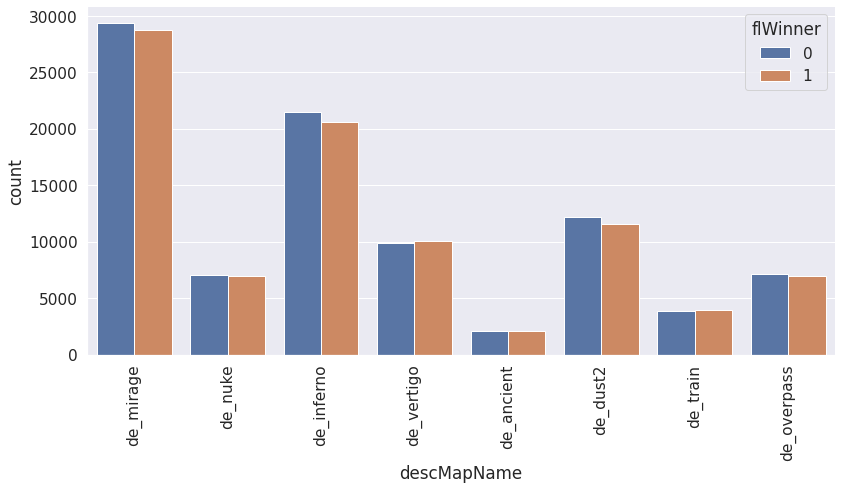

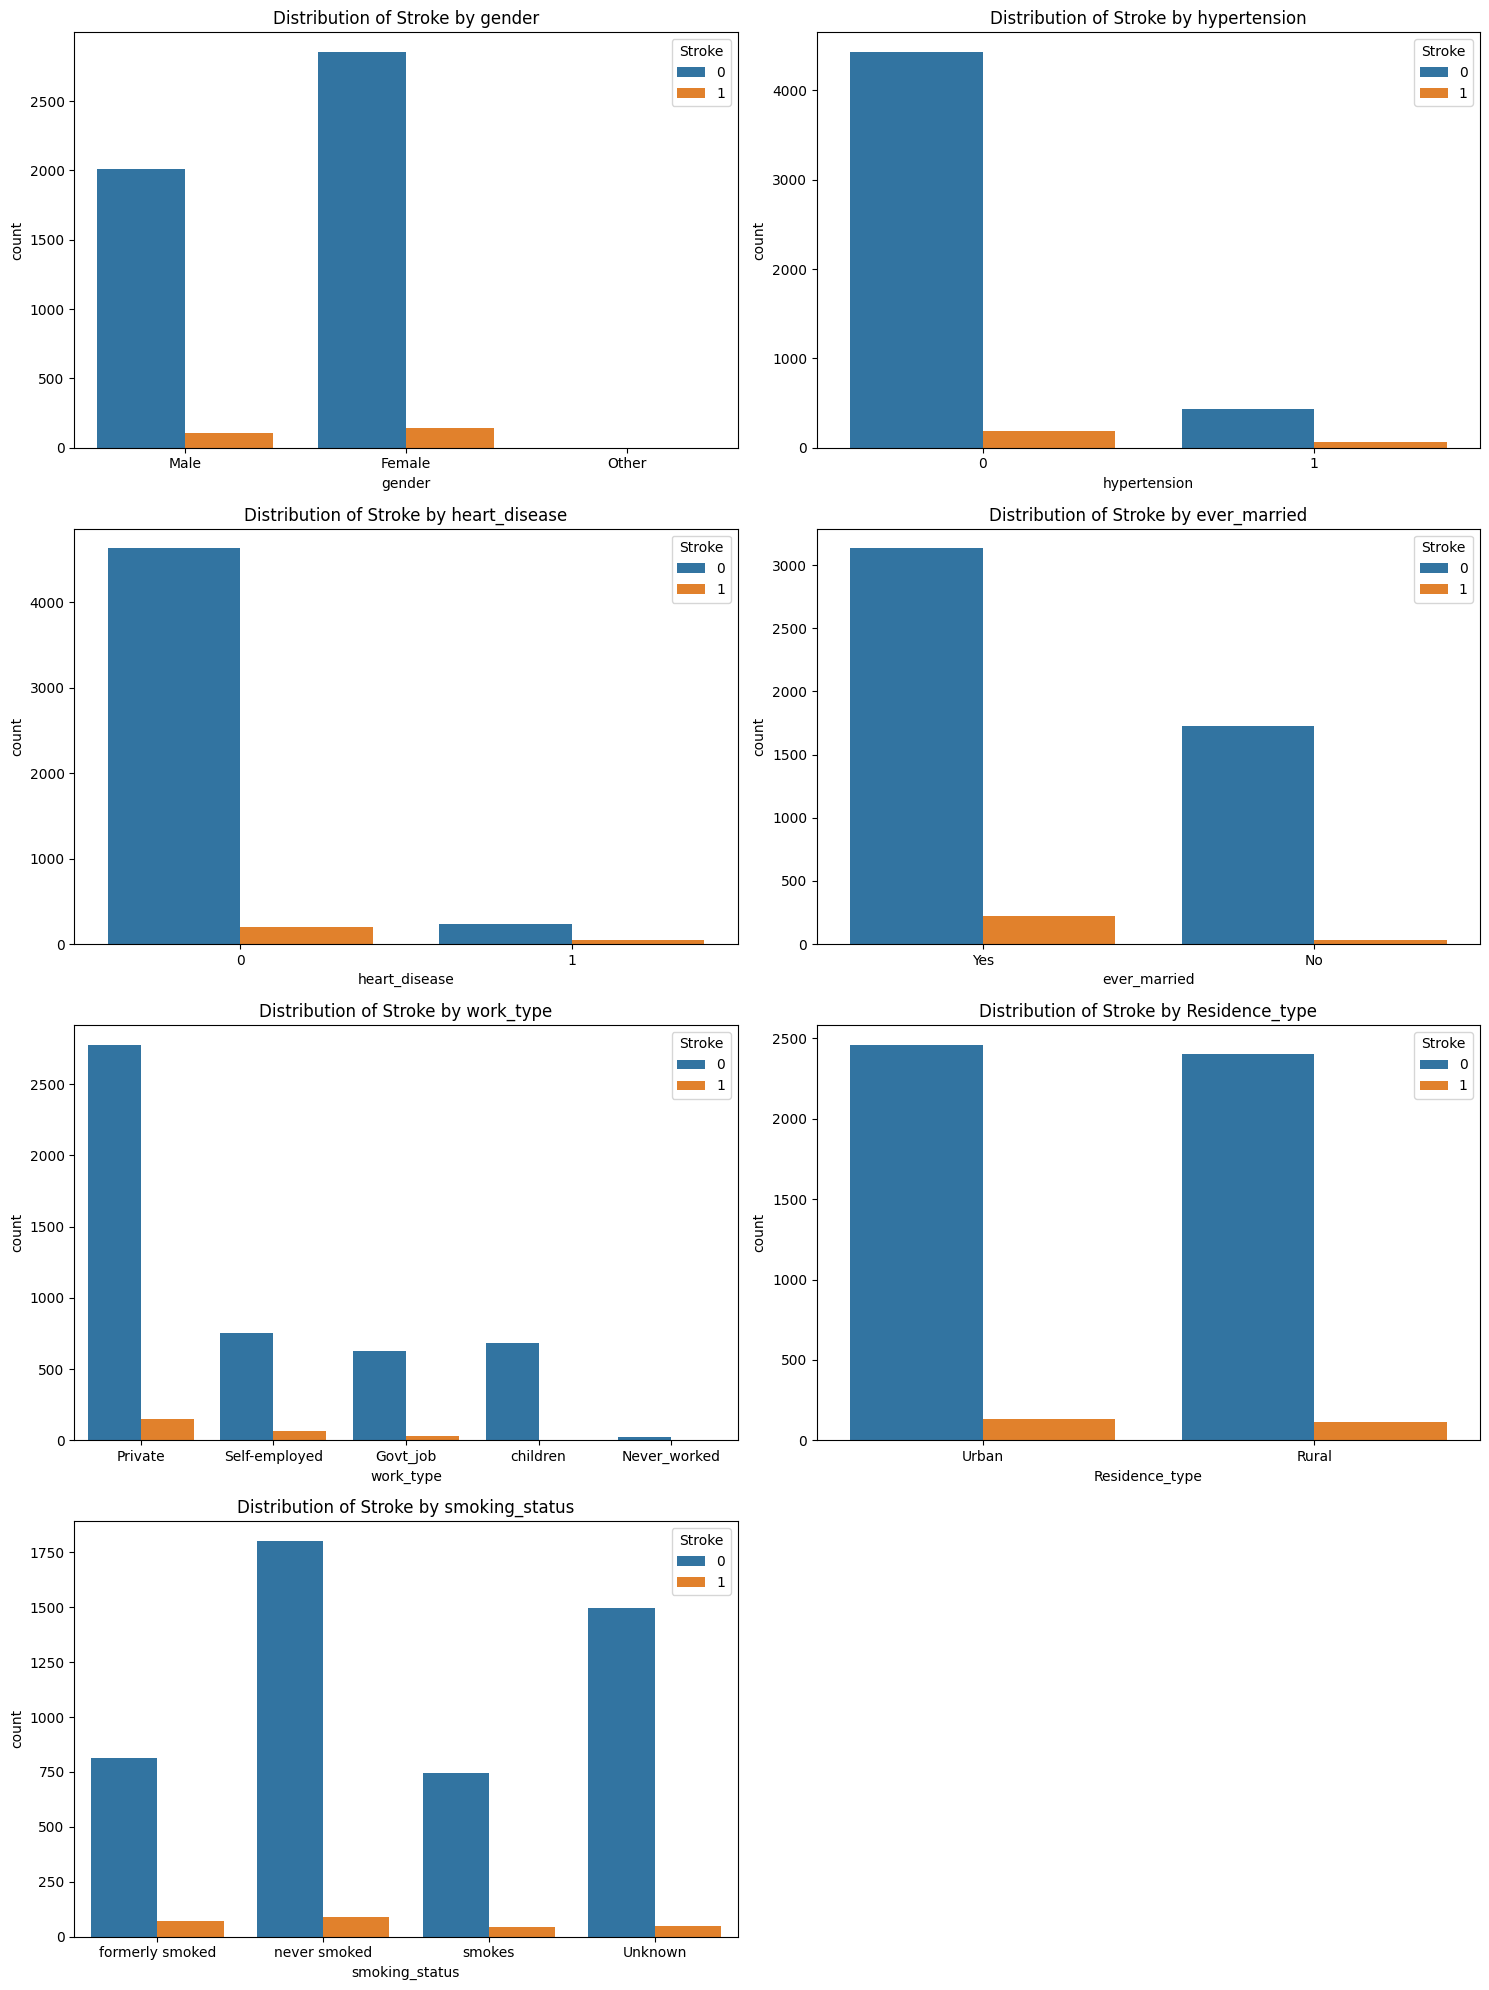

In [11]:
# Your code here
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 20))

for index, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, index)
    sns.countplot(data=df, x=feature, hue='stroke')
    plt.title(f"Distribution of Stroke by {feature}")
    plt.legend(title='Stroke', loc='upper right')

plt.tight_layout() # Adjust layout
plt.show()

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify.**

In [12]:
df_X = df.drop(columns=['stroke','id'])
df_Y = df['stroke'].astype(int)

## YOUR CODE HERE
df_X = pd.get_dummies(df_X, prefix=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df_X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


**Your Comments Here**: Decision trees don't need feature scaling because it is invariant to scale of data. Whether or not scaling the features doesn't affect its way to split the data when training. It only picks the split threshold with highest reduced entropy, that can be any continuous number.

**1.6: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [13]:
## YOUR CODE HERE
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, train_size = 0.8, random_state = 42, stratify = df_Y)

**Your Comments Here**: Using stratified splitting to split the dataset ensure both development set and test set have the same proportion of 1 and 0. Since we want to check the performance of predicting minority of the model, it is important to have the same proportion of minority in the training set to train the model, as well as in test set to evaluate.

**1.7: Fit a Decision Tree on the training data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**


**HINT : Think about the proportion of the class label**

In [14]:
## YOUR CODE HERE
clf = DecisionTreeClassifier(min_samples_split=2)

clf.fit(X_dev, y_dev)

predict_clf_dev = clf.predict(X_dev)
predict_clf_test = clf.predict(X_test)

In [15]:
print("Dev Set:")
print(classification_report(predict_clf_dev, y_dev))
print()
print("Test Set:")
print(classification_report(predict_clf_test, y_test))

Dev Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3889
           1       1.00      1.00      1.00       199

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088


Test Set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       955
           1       0.22      0.16      0.19        67

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.90      1022



**Your Comments Here:** I choose recall of 1 (minority group) as the most important metrics because the cost of false negative is high in this cost, i.e. missing those who are real stroke patient incurs worse result for patients. Therefore, I would be cautious, rather misdiagose some patients as stroke patients for further confirmation, than miss real stroke patients. Recall of training set is 1, and test set is around 0.16.

**1.8: Visualize the trained tree until the max_depth 8**

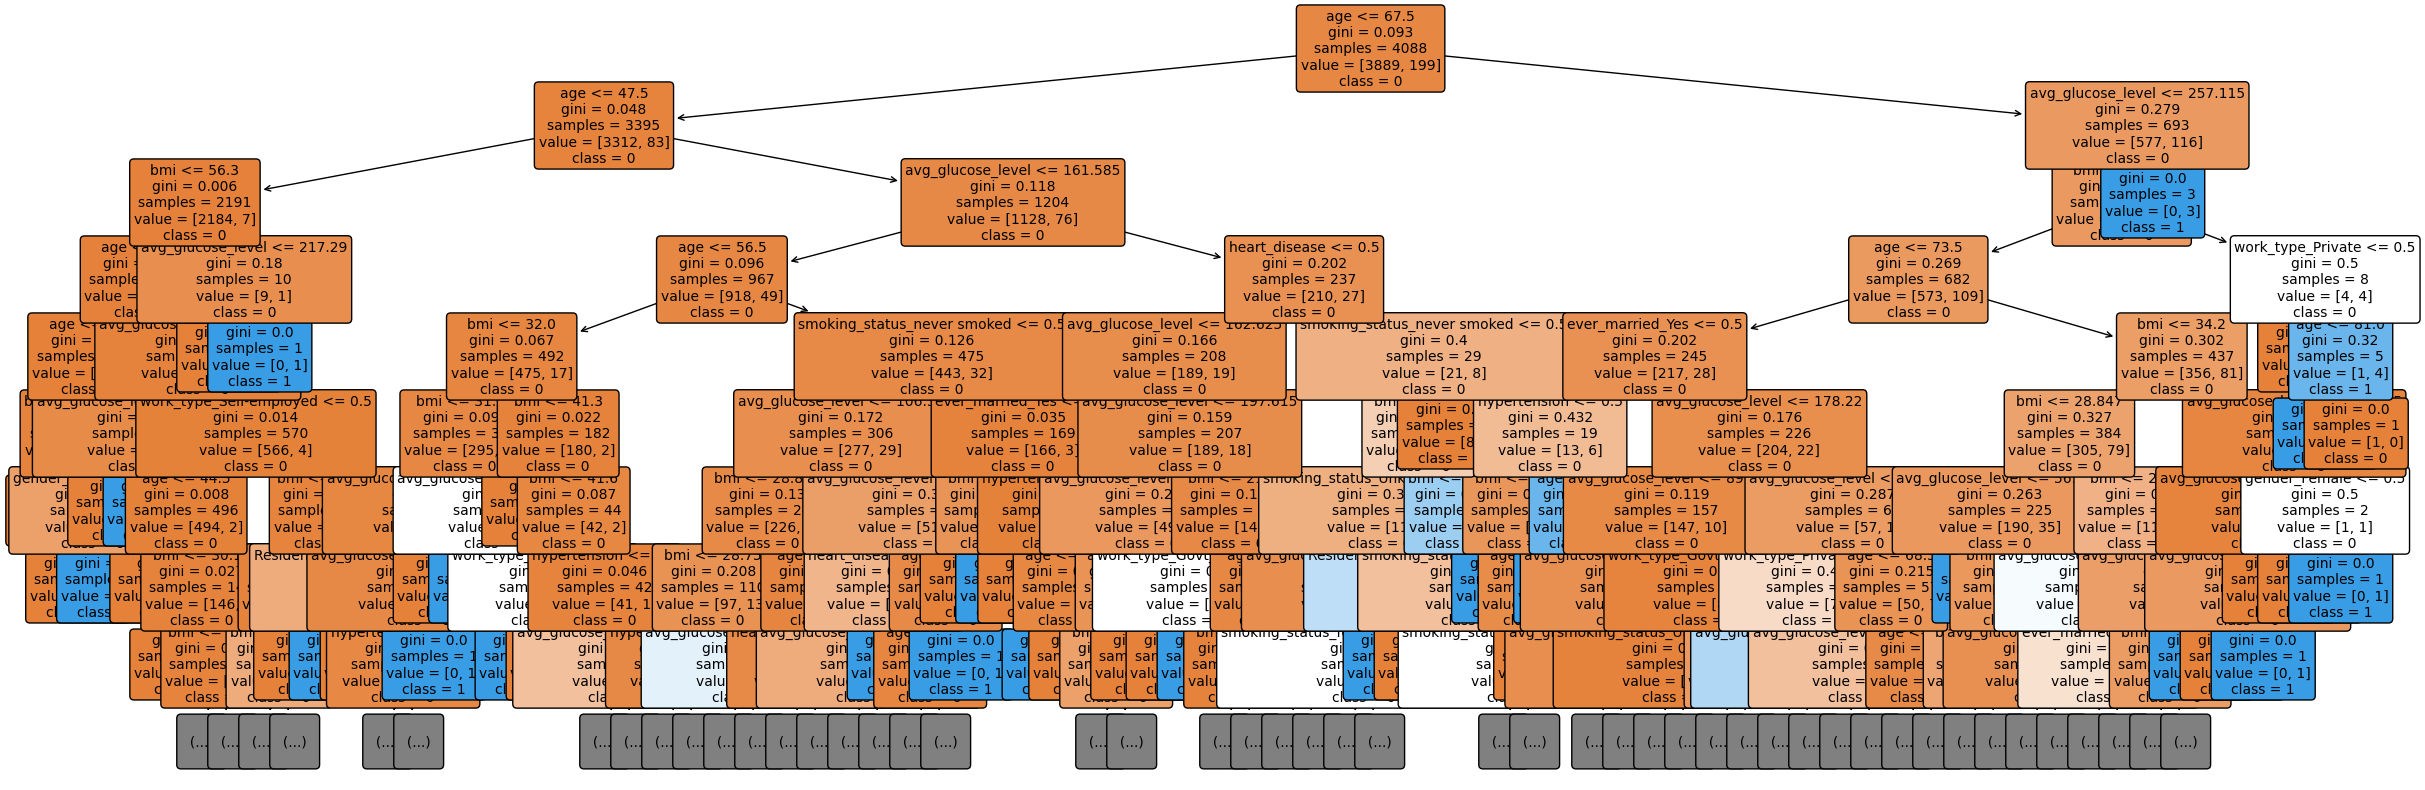

In [16]:
plt.figure(figsize=(30, 10))
plot_tree(clf, filled=True, feature_names=X_dev.columns, class_names=["0", "1"], rounded=True, fontsize=10, max_depth=8)
plt.show()

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance. Carefully consider which metric to use considering the imbalance in the class label.**

In [17]:
def hparam_clf():
    ccp_alpha = [0.5, 0.05, 0.005, 0.0005, 0.00005]
    recall_clf_ccp_test_list = []
    for i in ccp_alpha:
        clf_ccp = DecisionTreeClassifier(ccp_alpha = i)

        clf_ccp.fit(X_dev, y_dev)

        predict_clf_ccp_test = clf_ccp.predict(X_test)

        recall_clf_ccp_test = recall_score(y_test, predict_clf_ccp_test, pos_label = 1)
        recall_clf_ccp_test_list.append(recall_clf_ccp_test)
    print(f"Highest recall: {np.max(recall_clf_ccp_test_list)}")

    best_alpha = ccp_alpha[np.argmax(recall_clf_ccp_test_list)]
    print(f"ccp alpha at highest recall: {best_alpha}")

hparam_clf()

Highest recall: 0.22
ccp alpha at highest recall: 5e-05


**Your Comments Here:** Cut of the nodes and control the depth of the tree to prevent overfitting by tuning cost complexity. After that, recall improves to 0.22.

**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [18]:
clf_bestccp = DecisionTreeClassifier(ccp_alpha = 5e-05)
clf_bestccp.fit(X_dev, y_dev)

feat_imps = clf_bestccp.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_dev.columns,
    'Importance': feat_imps
})

top_3_features = features_df.sort_values(by='Importance', ascending=False).head(3)

print(top_3_features)

             Feature  Importance
3  avg_glucose_level    0.325058
4                bmi    0.224753
0                age    0.172125


**Your Comments Here:** They are all continuous variables. They become more important features in decision tree because they are more varied compared to categorical variables with small fixed amount of categories, so each tree can do several splits on these continuous variables.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [19]:
## YOUR CODE HERE
rf = RandomForestClassifier()

rf.fit(X_dev, y_dev)

predict_rf_dev = rf.predict(X_dev)
predict_rf_test = rf.predict(X_test)

In [20]:
print("Dev Set:")
print(classification_report(predict_rf_dev, y_dev))
print()
print("Test Set:")
print(classification_report(predict_rf_test, y_test))

Dev Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3889
           1       1.00      1.00      1.00       199

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088


Test Set:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1018
           1       0.02      0.25      0.04         4

    accuracy                           0.95      1022
   macro avg       0.51      0.60      0.51      1022
weighted avg       0.99      0.95      0.97      1022



**Your Comments Here:** The score of recall of minority class improves compared to decision tree, which is good, even though precision is much worse.

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [21]:
def leaf_purity(rf):
    for tree in rf.estimators_:
        gini_values = tree.tree_.impurity  # Gini impurity values at each node
        is_leaf = (tree.tree_.children_left == tree.tree_.children_right)  # Boolean list indicating whether leaf nodes

        # Check Gini impurity values for leaf nodes
        gini_values_at_leaves = gini_values[is_leaf]

        for gini in gini_values_at_leaves:
          if gini != 0:
              return False
    return True

pure_leaves = leaf_purity(rf)
pure_leaves

True

**Your Comments Here:** If leaf node is pure, then it should has gini index 0. The function checks if all leaf nodes have gini index 0, and it returns true.

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


**Your Comments Here:** I would choose to tune number of trees and number of features. Number of trees decides how many outputs to average in the end that can reduce model variance and make the prediction stable. Number of features influence generalization of the model, because number of features can choose different features for each tree, and hence further decide if correlation between different trees are high or low. Both are crucial to maximize performance and prevent overfitting.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

**Your Comments Here:** For number of trees, since the default 100 trees do not perform well enough, I would do trials 200, 300, 400 to see if increase performance. Only pick one number lower than that, which is 50, to be safe. I would also add warm_start to compare the effectiveness of adding more trees each time.

For number of features, besides the default sqrt, which is 4. Therefore, I would try 2,3,5,6. Big number of features would not help prevent overfitting well because it will cause high correlation among different trees.

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [22]:
## YOUR CODE HERE
def oob():
    n_estimators = [50,100,200,300,400]
    max_features = [2, 3, 'sqrt', 5, 6]
    max_score = 0
    best_n_estimators = None
    best_n_features = None

    for estimator in n_estimators:
      for max_feature in max_features:
        rf_2hparam_select = RandomForestClassifier(n_estimators = estimator, max_features = max_feature, random_state=42, oob_score=True, warm_start=True)
        rf_2hparam_select.fit(X_dev, y_dev)

        oob = rf_2hparam_select.oob_score_

        if oob > max_score:
            max_score = oob
            best_n_estimators = estimator
            best_n_features = max_feature

    print(f'Highest oob_score is {max_score}')
    print(f'best number of estimators is {best_n_estimators}')
    print(f'best number of features is {best_n_features}')
    return best_n_estimators, best_n_features

best_n_estimators_rf, best_n_features_rf = oob()

Highest oob_score is 0.9510763209393346
best number of estimators is 100
best number of features is 5


In [23]:
rf_2hparam_best = RandomForestClassifier(n_estimators = best_n_estimators_rf, max_features = best_n_features_rf, random_state=42, oob_score=True, warm_start=True)

rf_2hparam_best.fit(X_dev, y_dev)

predict_rf_dev_2hparam_best = rf_2hparam_best.predict(X_dev)
predict_rf_test_2hparam_best = rf_2hparam_best.predict(X_test)

In [24]:
print("Test Set:")
print(classification_report(predict_rf_test_2hparam_best, y_test))

Test Set:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1016
           1       0.04      0.33      0.07         6

    accuracy                           0.95      1022
   macro avg       0.52      0.64      0.52      1022
weighted avg       0.99      0.95      0.97      1022



**Your Comments Here:** Recall of minority class increases to 0.33, which is good.

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

In [25]:
## YOUR CODE HERE
feat_imps_rf = rf_2hparam_best.feature_importances_

features_df_rf = pd.DataFrame({
    'Feature': X_dev.columns,
    'Importance': feat_imps_rf
})

top_3_features_rf = features_df_rf.sort_values(by='Importance', ascending=False).head(3)

print(top_3_features_rf)

             Feature  Importance
3  avg_glucose_level    0.263277
0                age    0.232225
4                bmi    0.216352


**Your Comments Here:** The top 3 important features do not change. However, now they are of similar importance, and age is slightly more important than bmi. I feel the result from random forest makes more sense, because the output of random forest finds a way to average the outputs of individual decision trees, so its result is more stable and more representative.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation.  
You can use GridSearchCV, however make sure to use appropriate metric for the scoring parameter of GridSearchCV.  
Report on the time taken to do model selection for both the models. Also, report the performance of the test
dataset from the optimal models.**

In [26]:
type(X_dev)

pandas.core.frame.DataFrame

In [27]:
## YOUR CODE HERE
def GB():
    n_estimators = [100,200,300,400]
    max_features = [2, 3, 'sqrt', 5]
    learning_rates = np.logspace(-3,0,4)

    max_recall = 0
    best_n_estimators = None
    best_n_features = None
    best_learning_rates = None

    sfold = StratifiedKFold(n_splits = 5, shuffle = False) # 5-fold CV

    start_time = time.time()

    for estimator in n_estimators:
        for max_feature in max_features:
            for alpha in learning_rates:
                recall_scores = []

                GBC = GradientBoostingClassifier(n_estimators = estimator, max_features = max_feature, learning_rate = alpha, random_state=42, warm_start=True)

                # separate X_dev and y_dev based on 5-fold CV
                for train_index, val_index in sfold.split(X_dev, y_dev):
                    X_train_fold = X_dev.iloc[train_index]
                    X_test_fold = X_dev.iloc[val_index]
                    y_train_fold = y_dev.iloc[train_index]
                    y_test_fold = y_dev.iloc[val_index]

                    GBC.fit(X_train_fold, y_train_fold)
                    GBC_predict = GBC.predict(X_test_fold)

                    recall = recall_score(y_test_fold, GBC_predict, pos_label = 1)
                    recall_scores.append(recall)
                avg_recall = np.mean(recall_scores)

                if avg_recall > max_recall:
                    max_recall = avg_recall
                    best_n_estimators = estimator
                    best_n_features = max_feature
                    best_learning_rates = alpha

    end_time = time.time()
    duration = end_time - start_time
    print(f"The function took {duration:.2f} seconds to run.")

    print(f'Highest recall is {max_recall}')
    print(f'best number of estimators is {best_n_estimators}')
    print(f'best number of features is {best_n_features}')
    print(f'best learning rate is {best_learning_rates}')

    return best_n_estimators, best_n_features, best_learning_rates

best_n_estimators_GB, best_n_features_GB, best_learning_rate_GB = GB()

The function took 48.27 seconds to run.
Highest recall is 0.82
best number of estimators is 200
best number of features is 5
best learning rate is 1.0


In [28]:
def HGB():
    l2_regs = [0,0.01,0.1,1]
    bins = [64, 128, 200, 255]
    learning_rates = np.logspace(-3,0,4)

    max_recall = 0
    best_l2_reg = None
    best_bin = None
    best_learning_rate = None

    sfold = StratifiedKFold(n_splits = 5, shuffle = False) # 5-fold CV

    start_time = time.time()

    for l2_reg in l2_regs:
        for bin in bins:
            for alpha in learning_rates:
                recall_scores = []

                HGBC = HistGradientBoostingClassifier(l2_regularization = l2_reg, max_bins = bin, learning_rate = alpha, random_state=42, warm_start=True)

                # separate X_dev and y_dev based on 5-fold CV
                for train_index, val_index in sfold.split(X_dev, y_dev):
                    X_train_fold = X_dev.iloc[train_index]
                    X_test_fold = X_dev.iloc[val_index]
                    y_train_fold = y_dev.iloc[train_index]
                    y_test_fold = y_dev.iloc[val_index]

                    HGBC.fit(X_train_fold, y_train_fold)
                    HGBC_predict = HGBC.predict(X_test_fold)

                    recall = recall_score(y_test_fold, HGBC_predict, pos_label = 1)
                    recall_scores.append(recall)
                avg_recall = np.mean(recall_scores)

                if avg_recall > max_recall:
                    max_recall = avg_recall
                    best_l2_reg = l2_reg
                    best_bin = bin
                    best_learning_rates = alpha

    end_time = time.time()
    duration = end_time - start_time
    print(f"The function took {duration:.2f} seconds to run.")

    print(f'Highest recall is {max_recall}')
    print(f'best l2 regularization parameter is {best_l2_reg}')
    print(f'best max number of bins is {best_bin}')
    print(f'best learning rate is {best_learning_rates}')

    return best_l2_reg, best_bin, best_learning_rates

best_l2_reg_HGB, best_bin_HGB, best_learning_rate_HGB = HGB()

The function took 77.97 seconds to run.
Highest recall is 0.845
best l2 regularization parameter is 0.1
best max number of bins is 64
best learning rate is 1.0


In [29]:
# HistGradientBoostingClassifier has better performance, so decide to train its best model.
tuned_HGB = HistGradientBoostingClassifier(l2_regularization = best_l2_reg_HGB, max_bins = best_bin_HGB, learning_rate = best_learning_rate_HGB, random_state=42, warm_start=True)
tuned_HGB.fit(X_dev, y_dev)

tuned_y_pred_HGB = tuned_HGB.predict(X_test)

print("Test Set of HistGradientBoosting after tuning:")
print(classification_report(tuned_y_pred_HGB, y_test))

Test Set of HistGradientBoosting after tuning:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       986
           1       0.18      0.25      0.21        36

    accuracy                           0.93      1022
   macro avg       0.58      0.60      0.59      1022
weighted avg       0.94      0.93      0.94      1022



**Your Comments Here** : In terms of time, HistGradientBoosting does not train faster than GradientBoostingClassifier as expected, but this could be because of different hyperparameters chosen.

Optimal model is HistGradientBoostingClassifier, and its recall of minority group is 0.25.

**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [30]:
## YOUR CODE HERE
def XGB():
    n_estimators = [100,200,300, 400]
    l2_regs = [0.1, 0.5, 1, 1.5]
    learning_rates = [0.01, 0.1, 0.3, 1]

    max_recall = 0
    best_n_estimator = None
    best_l2 = None
    best_learning_rate = None

    sfold = StratifiedKFold(n_splits = 10, shuffle = False) # 5-fold CV

    start_time = time.time()

    for estimator in n_estimators:
        for l2_reg in l2_regs:
            for alpha in learning_rates:
                recall_scores = []

                XGBC = XGBClassifier(n_estimators = estimator, reg_lambda = l2_reg, learning_rate = alpha, random_state=42, warm_start=True)

                # separate X_dev and y_dev based on 10-fold CV
                for train_index, val_index in sfold.split(X_dev, y_dev):
                    X_train_fold = X_dev.iloc[train_index]
                    X_test_fold = X_dev.iloc[val_index]
                    y_train_fold = y_dev.iloc[train_index]
                    y_test_fold = y_dev.iloc[val_index]

                    XGBC.fit(X_train_fold, y_train_fold)
                    XGBC_predict = XGBC.predict(X_test_fold)

                    recall = recall_score(y_test_fold, XGBC_predict, pos_label = 1)
                    recall_scores.append(recall)
                avg_recall = np.mean(recall_scores)

                if avg_recall > max_recall:
                    max_recall = avg_recall
                    best_n_estimator = estimator
                    best_l2 = l2_reg
                    best_learning_rate = alpha

    end_time = time.time()
    duration = end_time - start_time
    print(f"The function took {duration:.2f} seconds to run.")

    print(f'Highest recall is {max_recall}')
    print(f'best number of estimators is {best_n_estimator}')
    print(f'best number of features is {best_l2}')
    print(f'best learning rate is {best_learning_rate}')

    return best_n_estimator, best_l2, best_learning_rate

best_n_estimator_XGB, best_l2_XGB, best_learning_rate_XGB = XGB()

The function took 220.69 seconds to run.
Highest recall is 0.11078947368421052
best number of estimators is 200
best number of features is 0.5
best learning rate is 1


In [31]:
xgb_best = XGBClassifier(n_estimators = best_n_estimator_XGB, reg_lambda = best_l2_XGB, learning_rate = best_learning_rate_XGB, random_state=42, warm_start=True)

xgb_best.fit(X_dev, y_dev)

predict_xgb_best = xgb_best.predict(X_test)

print("Test Set of XGBClassifier after tuning:")
print(classification_report(predict_xgb_best, y_test))

Test Set of XGBClassifier after tuning:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       993
           1       0.12      0.21      0.15        29

    accuracy                           0.93      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.95      0.93      0.94      1022



**Your Comments Here:** The recall of minority class is 0.21, slightly worse than the best model of HistGradientBoosting.



**3.3: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

In [32]:
## YOUR CODE HERE
feat_imps_xgb = xgb_best.feature_importances_

features_df_xgb = pd.DataFrame({
    'Feature': X_dev.columns,
    'Importance': feat_imps_xgb
})

top_7_features_xgb = features_df_xgb.sort_values(by='Importance', ascending=False).head(7)

print(top_7_features_xgb)

                   Feature  Importance
8          ever_married_No    0.143135
2            heart_disease    0.095733
20   smoking_status_smokes    0.094731
0                      age    0.083447
17  smoking_status_Unknown    0.073015
1             hypertension    0.063895
12       work_type_Private    0.056203


**Your Comments Here:** Now all three most important features become categorical features: whether not married, whether have heart disease, whether smokes. I think smoking stats and heart disease make sense because both they both increase risk of getting stroke in reality. However, if ever married is a bit counterintuitive. I would trust the one from random forest because features there all make intuitive sense, and from the perspective of the result, the model leads to better performance with those features.

**3.4: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [33]:
## YOUR CODE HERE
new_features = top_7_features_xgb['Feature'].tolist()
X_dev_new = X_dev[new_features]
X_test_new = X_test[new_features]

In [34]:
def XGB_newfeatures():
    n_estimators = [100,200,300, 400]
    l2_regs = [0.1, 0.5, 1, 1.5]
    learning_rates = [0.01, 0.1, 0.3, 1]

    max_recall = 0
    best_n_estimator = None
    best_l2 = None
    best_learning_rate = None

    sfold = StratifiedKFold(n_splits = 10, shuffle = False) # 5-fold CV

    start_time = time.time()

    for estimator in n_estimators:
        for l2_reg in l2_regs:
            for alpha in learning_rates:
                recall_scores = []

                XGBC = XGBClassifier(n_estimators = estimator, reg_lambda = l2_reg, learning_rate = alpha, random_state=42, warm_start=True)

                # separate X_dev_new and y_dev based on 10-fold CV
                for train_index, val_index in sfold.split(X_dev_new, y_dev):
                    X_train_fold = X_dev_new.iloc[train_index]
                    X_test_fold = X_dev_new.iloc[val_index]
                    y_train_fold = y_dev.iloc[train_index]
                    y_test_fold = y_dev.iloc[val_index]

                    XGBC.fit(X_train_fold, y_train_fold)
                    XGBC_predict = XGBC.predict(X_test_fold)

                    recall = recall_score(y_test_fold, XGBC_predict, pos_label = 1)
                    recall_scores.append(recall)
                avg_recall = np.mean(recall_scores)

                if avg_recall > max_recall:
                    max_recall = avg_recall
                    best_n_estimator = estimator
                    best_l2 = l2_reg
                    best_learning_rate = alpha

    end_time = time.time()
    duration = end_time - start_time
    print(f"The function took {duration:.2f} seconds to run.")

    print(f'Highest recall is {max_recall}')
    print(f'best number of estimators is {best_n_estimator}')
    print(f'best number of features is {best_l2}')
    print(f'best learning rate is {best_learning_rate}')

    return best_n_estimator, best_l2, alpha

best_n_estimator_XGB_7features, best_l2_XGB_7features, best_learning_rate_XGB_7features = XGB_newfeatures()

The function took 124.31 seconds to run.
Highest recall is 0.060526315789473685
best number of estimators is 300
best number of features is 1
best learning rate is 0.3


In [35]:
xgb_best_newfeatures = XGBClassifier(n_estimators = best_n_estimator_XGB_7features, reg_lambda = best_l2_XGB_7features, learning_rate = best_learning_rate_XGB_7features, random_state=42, warm_start=True)

xgb_best_newfeatures.fit(X_dev_new, y_dev) # dataframe with 7 features

predict_xgb_best_newfeatures = xgb_best_newfeatures.predict(X_test_new)

print("Test Set of XGBClassifier after tuning:")
print(classification_report(predict_xgb_best_newfeatures, y_test))

Test Set of XGBClassifier after tuning:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1006
           1       0.06      0.19      0.09        16

    accuracy                           0.94      1022
   macro avg       0.52      0.57      0.53      1022
weighted avg       0.97      0.94      0.96      1022



**Your comments here:** The recall of minority group is slightly worse than the original model. This is probably because features have similar importance, so selecting among a smaller range does not help prevent overfitting a lot. Moreover, we have already tuned 3 hyperparameters to prevent overfitting, so further scaling range of features may not be of much help if we want to improve performance simply by hyperparameter tuning.

**3.5: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

The model with highest recall on minority group is Random Forest after hyperparameter tuning (0.33), and with lowest recall is decision tree (0.16). Random Forest almost has 2 times the recall, but still needs improvement since 0.33 is still low. I would choose Random Forest because not only because it gives higher return, but it finds a way to average the output of hundreds of decision trees to increase stability, which makes the result more representative and stable.

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [36]:
## YOUR CODE HERE
print(f'brier score: {brier_score_loss(y_test, predict_xgb_best)}')

brier score: 0.06555772994129158


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods. Report brier score after calibration.**

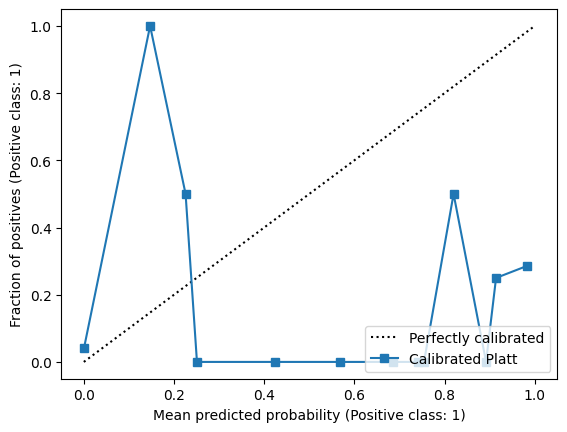

In [37]:
cal_xgb_platt = CalibratedClassifierCV(xgb_best, cv = 'prefit', method = 'sigmoid')
cal_xgb_platt.fit(X_dev, y_dev)
display = CalibrationDisplay.from_estimator(cal_xgb_platt, X_test, y_test, n_bins = 20, name = 'Calibrated Platt')

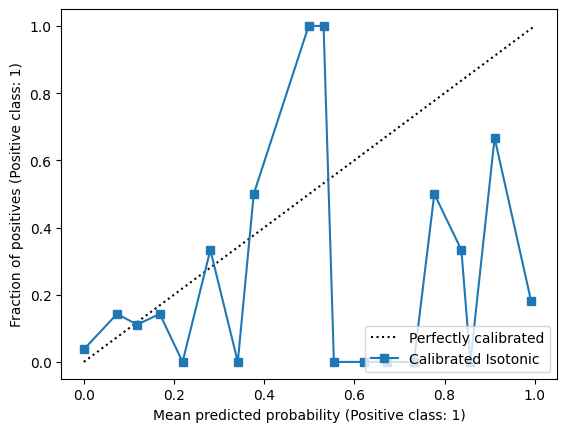

In [38]:
## YOUR CODE HERE
cal_xgb_isotonic = CalibratedClassifierCV(xgb_best, cv = 'prefit', method = 'isotonic')
cal_xgb_isotonic.fit(X_dev, y_dev)
display = CalibrationDisplay.from_estimator(cal_xgb_isotonic, X_test, y_test, n_bins = 20, name = 'Calibrated Isotonic')

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [39]:
predict_xgb_platt = cal_xgb_platt.predict(X_test)
predict_xgb_isotonic = cal_xgb_isotonic.predict(X_test)

In [40]:
## YOUR CODE HERE
print(f'brier score after Platt Scaling: {brier_score_loss(y_test, predict_xgb_platt)}')
print(f'brier score after Isotonic Regression: {brier_score_loss(y_test, predict_xgb_isotonic)}')

brier score after Platt Scaling: 0.06164383561643835
brier score after Isotonic Regression: 0.06457925636007827


They perform slightly better after calibration with lower brier scores.